# Draft Deep Dive

## Importing & Describing Data

In [1]:
#===================
# Importing base packages
#===================
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#===================
# PCA packages for Feature Reduction
#===================
from sklearn.decomposition import PCA as pca
from sklearn import preprocessing

#===================
# Factor Analysis Packages
#===================
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

#===================
# Logistic Regression Model
#===================
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

# Alternative model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

#===================
# Linear Regression Packages
#===================

#For QQ Plot
import scipy.stats as sts

#Correlation p-values
from scipy.stats import pearsonr

#Regression output
from sklearn.linear_model import LinearRegression

# Model that can handle N/As
from sklearn.ensemble import HistGradientBoostingRegressor

#===================
# Decision Tree Packages
#===================
from sklearn import tree
from sklearn import metrics

# Model that can handle N/As
from sklearn.ensemble import HistGradientBoostingClassifier

#===================
# Random Forest Packages
#===================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score,plot_confusion_matrix

#===================
# Neural Networks
#===================
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

#===================
# Imputation for NAs
#===================
from sklearn.impute import SimpleImputer

In [148]:
# Read and describe data
os.chdir('/Users/wesjurden/Documents/GitHub/Personal/college-football-project/data/transform')

df = pd.read_csv('trans_draft_stats_2022.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 78 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   collegeAthleteId         296 non-null    int64  
 1   nflAthleteId             296 non-null    int64  
 2   collegeId                296 non-null    int64  
 3   collegeTeam              296 non-null    object 
 4   collegeConference        296 non-null    object 
 5   nflTeam                  296 non-null    object 
 6   year                     296 non-null    int64  
 7   overall                  296 non-null    int64  
 8   round                    296 non-null    int64  
 9   pick                     296 non-null    int64  
 10  name                     296 non-null    object 
 11  position                 296 non-null    object 
 12  height                   287 non-null    float64
 13  weight                   287 non-null    float64
 14  preDraftRanking          2

In [149]:
# Create a model to predict overall ranking - will need to be something that can handle NAs
df.head()

,collegeAthleteId,nflAthleteId,collegeId,collegeTeam,collegeConference,nflTeam,year,overall,round,pick,...,receiving_LONG,receiving_REC,receiving_TD,receiving_YDS,receiving_YPR,rushing_CAR,rushing_LONG,rushing_TD,rushing_YDS,rushing_YPC
0,4426349,105673,61,Georgia,SEC,Jacksonville,2022,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4243256,105546,254,Utah,Pac-12,Jacksonville,2022,27,1,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4035048,106034,96,Kentucky,SEC,Jacksonville,2022,65,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4361707,105914,2751,Wyoming,Mountain West,Jacksonville,2022,70,3,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4567246,106128,145,Ole Miss,SEC,Jacksonville,2022,154,5,11,...,14.0,14.0,0.0,82.0,5.9,130.0,51.0,13.0,647.0,5.0


In [150]:
df.shape

(296, 78)

In [151]:
df.columns

Index(['collegeAthleteId', 'nflAthleteId', 'collegeId', 'collegeTeam',
       'collegeConference', 'nflTeam', 'year', 'overall', 'round', 'pick',
       'name', 'position', 'height', 'weight', 'preDraftRanking',
       'preDraftPositionRanking', 'preDraftGrade', 'location', 'nickname',
       'displayName', 'logo', 'img', 'link', 'playerId', 'defensive_PD',
       'defensive_QB HUR', 'defensive_SACKS', 'defensive_SOLO', 'defensive_TD',
       'defensive_TFL', 'defensive_TOT', 'fumbles_FUM', 'fumbles_LOST',
       'fumbles_REC', 'interceptions_AVG', 'interceptions_INT',
       'interceptions_TD', 'interceptions_YDS', 'kickReturns_AVG',
       'kickReturns_LONG', 'kickReturns_NO', 'kickReturns_TD',
       'kickReturns_YDS', 'kicking_FGA', 'kicking_FGM', 'kicking_LONG',
       'kicking_PCT', 'kicking_PTS', 'kicking_XPA', 'kicking_XPM',
       'passing_ATT', 'passing_COMPLETIONS', 'passing_INT', 'passing_PCT',
       'passing_TD', 'passing_YDS', 'passing_YPA', 'puntReturns_AVG',
       'pu

In [152]:
# Split into Training and Test
features = ['height', 'weight', 'preDraftRanking', 'preDraftPositionRanking', 
            'preDraftGrade', 'defensive_PD',
            'defensive_QB HUR', 'defensive_SACKS', 'defensive_SOLO', 'defensive_TD',
            'defensive_TFL', 'defensive_TOT', 'fumbles_FUM', 'fumbles_LOST',
            'fumbles_REC', 'interceptions_AVG', 'interceptions_INT',
            'interceptions_TD', 'interceptions_YDS', 'kickReturns_AVG',
            'kickReturns_LONG', 'kickReturns_NO', 'kickReturns_TD',
            'kickReturns_YDS', 'kicking_FGA', 'kicking_FGM', 'kicking_LONG',
            'kicking_PCT', 'kicking_PTS', 'kicking_XPA', 'kicking_XPM',
            'passing_ATT', 'passing_COMPLETIONS', 'passing_INT', 'passing_PCT',
            'passing_TD', 'passing_YDS', 'passing_YPA', 'puntReturns_AVG',
            'puntReturns_LONG', 'puntReturns_NO', 'puntReturns_TD',
            'puntReturns_YDS', 'punting_In 20', 'punting_LONG', 'punting_NO',
            'punting_TB', 'punting_YDS', 'punting_YPP', 'receiving_LONG',
            'receiving_REC', 'receiving_TD', 'receiving_YDS', 'receiving_YPR',
            'rushing_CAR', 'rushing_LONG', 'rushing_TD', 'rushing_YDS',
            'rushing_YPC']

X = df.loc[:,features]
y = df.loc[:,['overall']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

In [153]:
# Scalling the data 
scaler = preprocessing.StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

## Create Histogram Gradient Boosting Regressor Model

In [167]:
# Create instance
hreg = HistGradientBoostingRegressor(random_state=1)

In [168]:
# Fit model
hreg.fit(X_train, y_train)

/Users/wesjurden/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HistGradientBoostingRegressor(random_state=1)

In [169]:
# Predict values
preds = hreg.predict(X_test)

In [170]:
# Score values
hreg.score(X_test,y_test)

0.8439069372671989

Text(0, 0.5, 'Predicted')

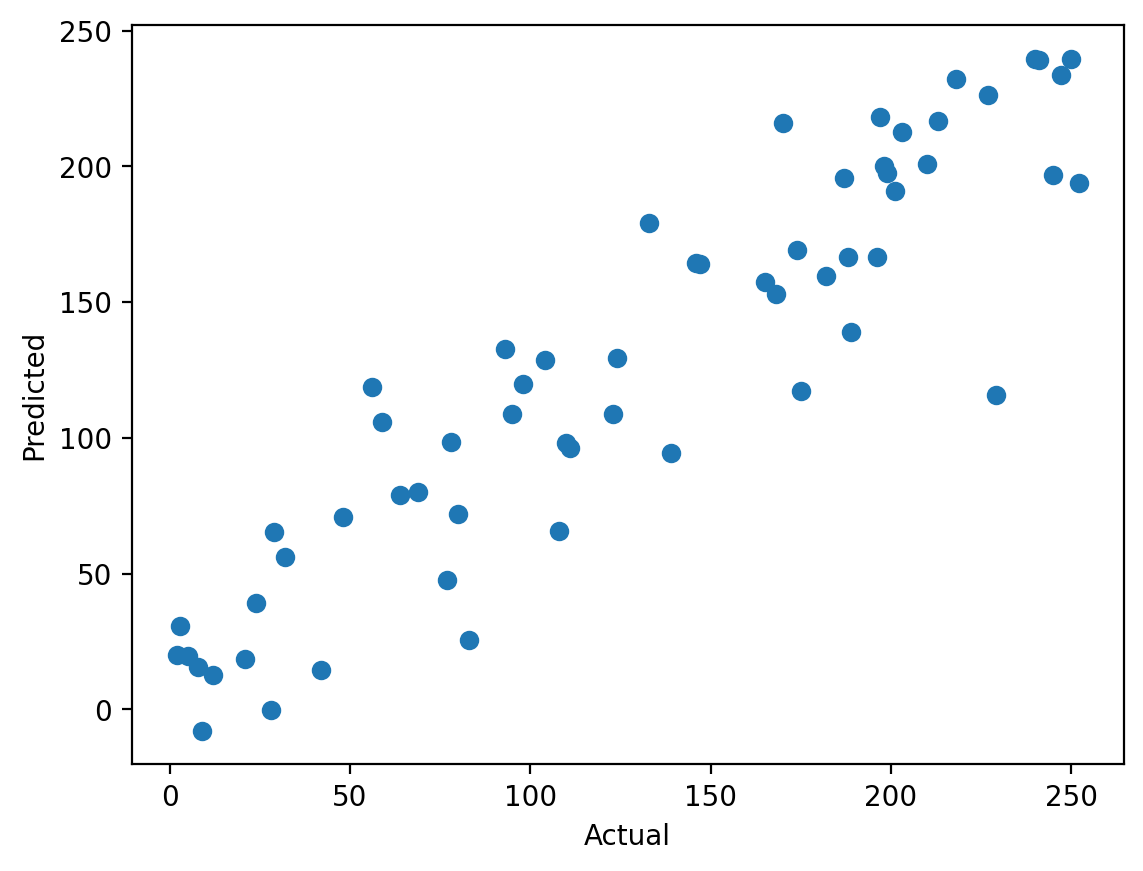

In [171]:
# Plot actual vs. predicted
plt.scatter(y_test, preds)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [172]:
preds2 = preds.round()

In [173]:
preds_list = preds2.tolist()

In [174]:
test = pd.DataFrame(preds2, columns=['predictions'], index = y_test.index)
test.head()

,predictions
230,232.0
228,179.0
12,166.0
215,14.0
264,196.0


In [175]:
test['test'] = y_test.overall

In [176]:
test.head()

,predictions,test
230,232.0,218
228,179.0,133
12,166.0,188
215,14.0,42
264,196.0,187


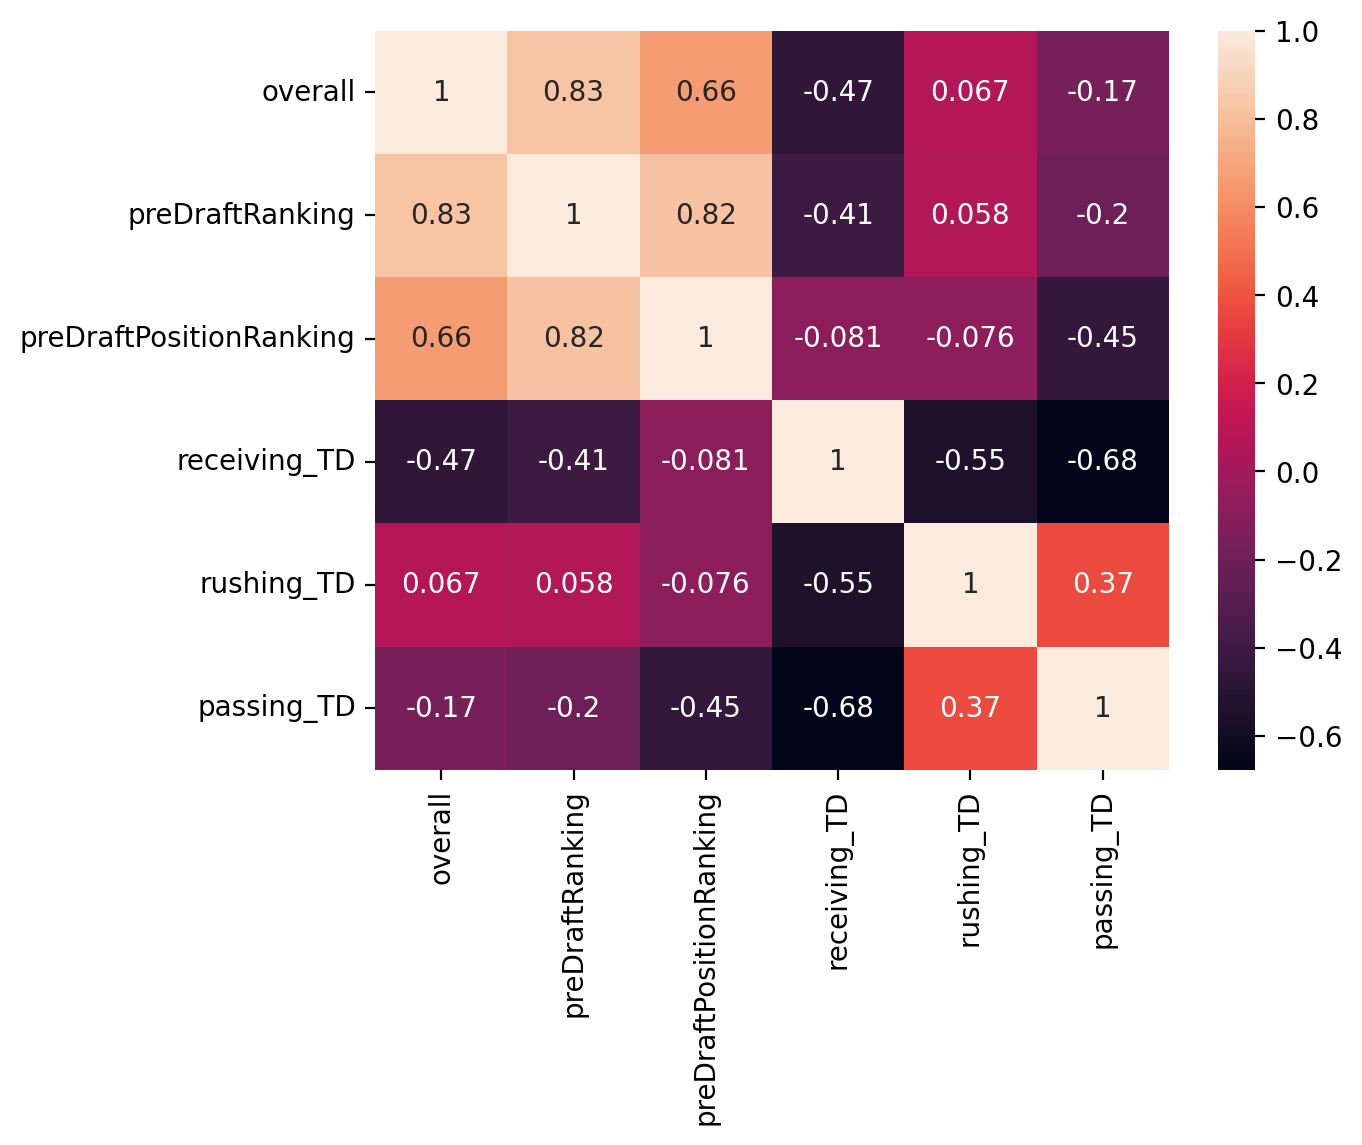

In [177]:
# Correlation Matrix of Values that Likely do a good job of predicting overall ranking
corr_matrix = df[['overall', 'preDraftRanking', 'preDraftPositionRanking', 'receiving_TD', 'rushing_TD', 'passing_TD']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

<AxesSubplot:xlabel='preDraftRanking', ylabel='overall'>

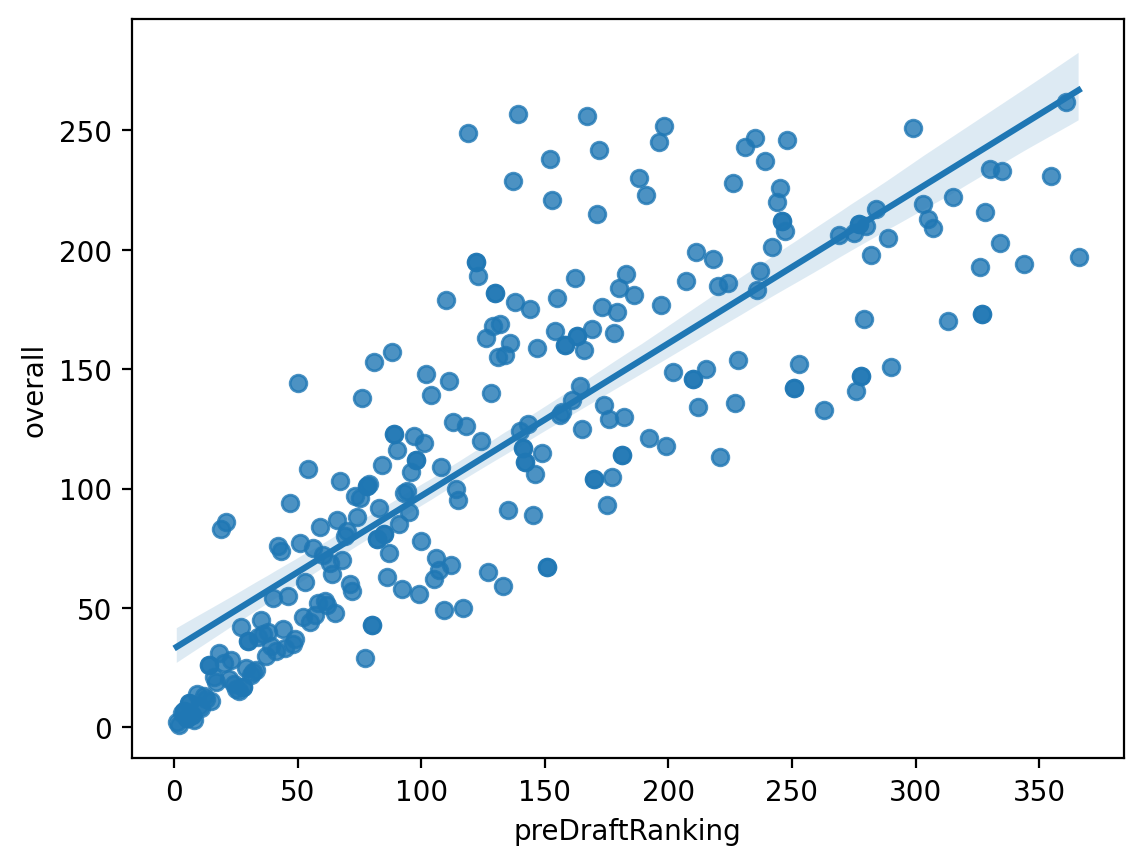

In [178]:
# PreDraftRanking does a good job the first round or so, then gets worse
sns.regplot(data=df, x='preDraftRanking', y='overall')

In [179]:
# MSE for Histogram Gradient Boosting Regressor Model
metrics.mean_squared_error(y_test, preds2)

950.25

## Tune Histogram Gradient Boosting Regressor Model

In [216]:
# Create and fit instance
hreg = HistGradientBoostingRegressor(random_state=1, loss='absolute_error', learning_rate=0.15,
                                    max_iter=500, min_samples_leaf=10, max_leaf_nodes=20).fit(X_train, y_train)

/Users/wesjurden/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [217]:
# Predict values & get MSE
preds = hreg.predict(X_test)
metrics.mean_squared_error(y_test, preds)

926.3922777448278

Text(0, 0.5, 'Predicted')

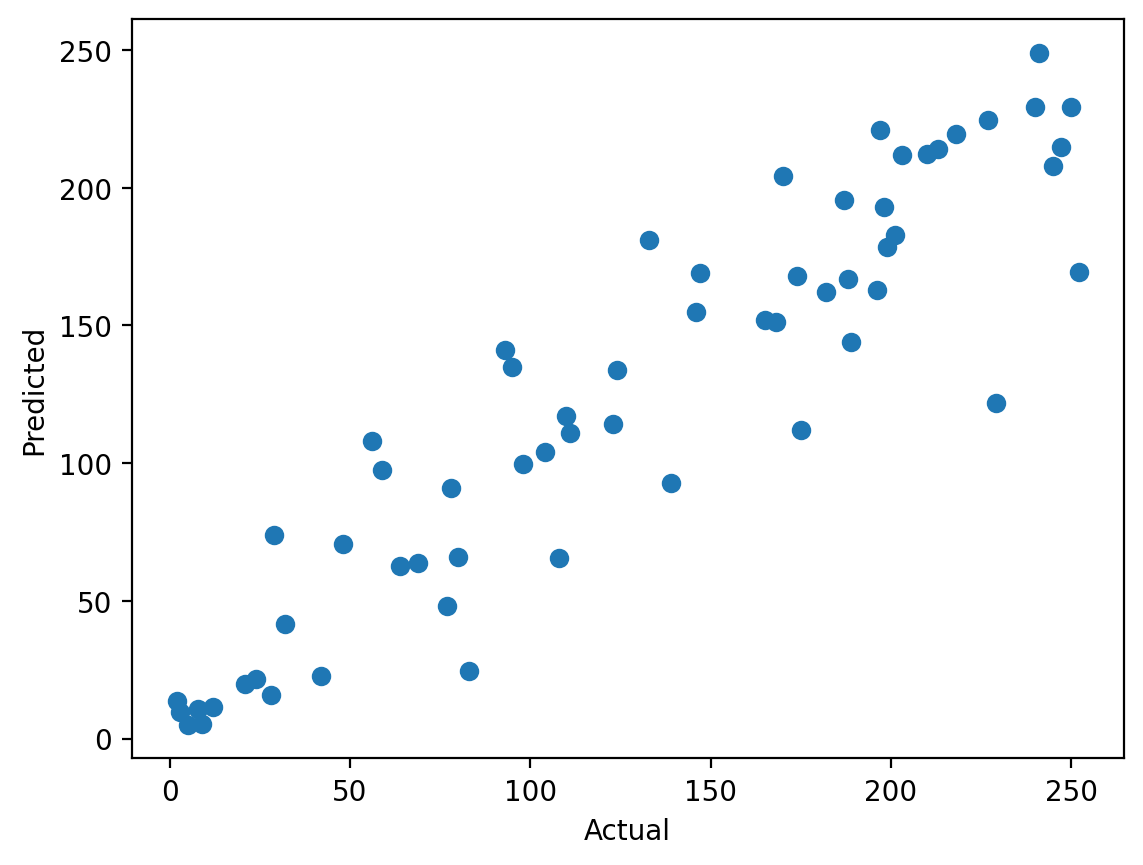

In [218]:
plt.scatter(y_test, preds)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [222]:
preds3 = np.round(preds)
preds3

array([220., 181., 167.,  23., 196., 111., 212., 169., 169., 144., 215.,
        10.,  64., 225., 204., 151., 152.,  63.,  11., 229., 155., 141.,
       179., 135.,  91.,  74., 122.,  48.,  66.,  42.,  11., 212., 104.,
       249., 114.,  22., 221., 117.,  93., 193., 183., 100., 108., 162.,
        14., 208.,   5.,  71., 163., 214.,  16., 229.,   5., 168.,  25.,
        97.,  66.,  20., 112., 134.])

In [225]:
# Create data frame of actual and predicted
model2 = pd.DataFrame({'actual': y_test.overall, 'prediction': preds3})

In [231]:
# Create columns
model2['error'] = model2.actual - model2.prediction
model2['preDraftRanking'] = df['preDraftRanking'].iloc[model2.index]
model2['pdr_error'] = model2.actual - model2.preDraftRanking

In [233]:
# Compare error to pdr
model2.loc[np.abs(model2.error) <= np.abs(model2.pdr_error), 'equal_or_lower_than_pdr?'] = True 
model2.loc[np.abs(model2.error) > np.abs(model2.pdr_error), 'equal_or_lower_than_pdr?'] = False

In [237]:
# Compare how many times this model was better than PDR
# THe model has a lower ab
model2['equal_or_lower_than_pdr?'].value_counts()

True     35
False    20
Name: equal_or_lower_than_pdr?, dtype: int64

In [251]:
# Model MAE
(np.abs(model2.error)).mean()

21.25

In [250]:
# PDR MAE
(np.abs(model2.pdr_error)).mean()

41.527272727272724

## Create a ANN Model

In [32]:
# Need to fill in NAs in order to complete this
stats = ['preDraftGrade','defensive_PD',
            'defensive_QB HUR', 'defensive_SACKS', 'defensive_SOLO', 'defensive_TD',
            'defensive_TFL', 'defensive_TOT', 'fumbles_FUM', 'fumbles_LOST',
            'fumbles_REC', 'interceptions_AVG', 'interceptions_INT',
            'interceptions_TD', 'interceptions_YDS', 'kickReturns_AVG',
            'kickReturns_LONG', 'kickReturns_NO', 'kickReturns_TD',
            'kickReturns_YDS', 'kicking_FGA', 'kicking_FGM', 'kicking_LONG',
            'kicking_PCT', 'kicking_PTS', 'kicking_XPA', 'kicking_XPM',
            'passing_ATT', 'passing_COMPLETIONS', 'passing_INT', 'passing_PCT',
            'passing_TD', 'passing_YDS', 'passing_YPA', 'puntReturns_AVG',
            'puntReturns_LONG', 'puntReturns_NO', 'puntReturns_TD',
            'puntReturns_YDS', 'punting_In 20', 'punting_LONG', 'punting_NO',
            'punting_TB', 'punting_YDS', 'punting_YPP', 'receiving_LONG',
            'receiving_REC', 'receiving_TD', 'receiving_YDS', 'receiving_YPR',
            'rushing_CAR', 'rushing_LONG', 'rushing_TD', 'rushing_YDS',
            'rushing_YPC']

df[stats] = df[stats].fillna(0)

In [33]:
df.head()

,collegeAthleteId,nflAthleteId,collegeId,collegeTeam,collegeConference,nflTeam,year,overall,round,pick,...,receiving_LONG,receiving_REC,receiving_TD,receiving_YDS,receiving_YPR,rushing_CAR,rushing_LONG,rushing_TD,rushing_YDS,rushing_YPC
0,4426349,105673,61,Georgia,SEC,Jacksonville,2022,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4243256,105546,254,Utah,Pac-12,Jacksonville,2022,27,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4035048,106034,96,Kentucky,SEC,Jacksonville,2022,65,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4361707,105914,2751,Wyoming,Mountain West,Jacksonville,2022,70,3,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4567246,106128,145,Ole Miss,SEC,Jacksonville,2022,154,5,11,...,14.0,14.0,0.0,82.0,5.9,130.0,51.0,13.0,647.0,5.0


In [47]:
# Fill NA for these values. Since lower is better, want those who were not ranked to have a high value
df[['preDraftRanking', 'preDraftPositionRanking']] = df[['preDraftRanking', 'preDraftPositionRanking']].fillna(1000)

In [ ]:
# Fill height and weight with average value
df['height'] = df['height'].fillna(int(df['height'].mean()))
df['weight'] = df['weight'].fillna(int(df['weight'].mean()))

In [56]:
# Split into Training and Test
features = ['height', 'weight', 'preDraftRanking', 'preDraftPositionRanking', 
            'preDraftGrade', 'defensive_PD',
            'defensive_QB HUR', 'defensive_SACKS', 'defensive_SOLO', 'defensive_TD',
            'defensive_TFL', 'defensive_TOT', 'fumbles_FUM', 'fumbles_LOST',
            'fumbles_REC', 'interceptions_AVG', 'interceptions_INT',
            'interceptions_TD', 'interceptions_YDS', 'kickReturns_AVG',
            'kickReturns_LONG', 'kickReturns_NO', 'kickReturns_TD',
            'kickReturns_YDS', 'kicking_FGA', 'kicking_FGM', 'kicking_LONG',
            'kicking_PCT', 'kicking_PTS', 'kicking_XPA', 'kicking_XPM',
            'passing_ATT', 'passing_COMPLETIONS', 'passing_INT', 'passing_PCT',
            'passing_TD', 'passing_YDS', 'passing_YPA', 'puntReturns_AVG',
            'puntReturns_LONG', 'puntReturns_NO', 'puntReturns_TD',
            'puntReturns_YDS', 'punting_In 20', 'punting_LONG', 'punting_NO',
            'punting_TB', 'punting_YDS', 'punting_YPP', 'receiving_LONG',
            'receiving_REC', 'receiving_TD', 'receiving_YDS', 'receiving_YPR',
            'rushing_CAR', 'rushing_LONG', 'rushing_TD', 'rushing_YDS',
            'rushing_YPC']

X2 = df.loc[:,features]
y2 = df.loc[:,['overall']]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0, train_size = .80)

In [64]:
# Create and fit model
regr = MLPRegressor(random_state=1, max_iter=500).fit(X2_train, y2_train)

/Users/wesjurden/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
predictions = regr.predict(X2_test)

Text(0, 0.5, 'Predicted')

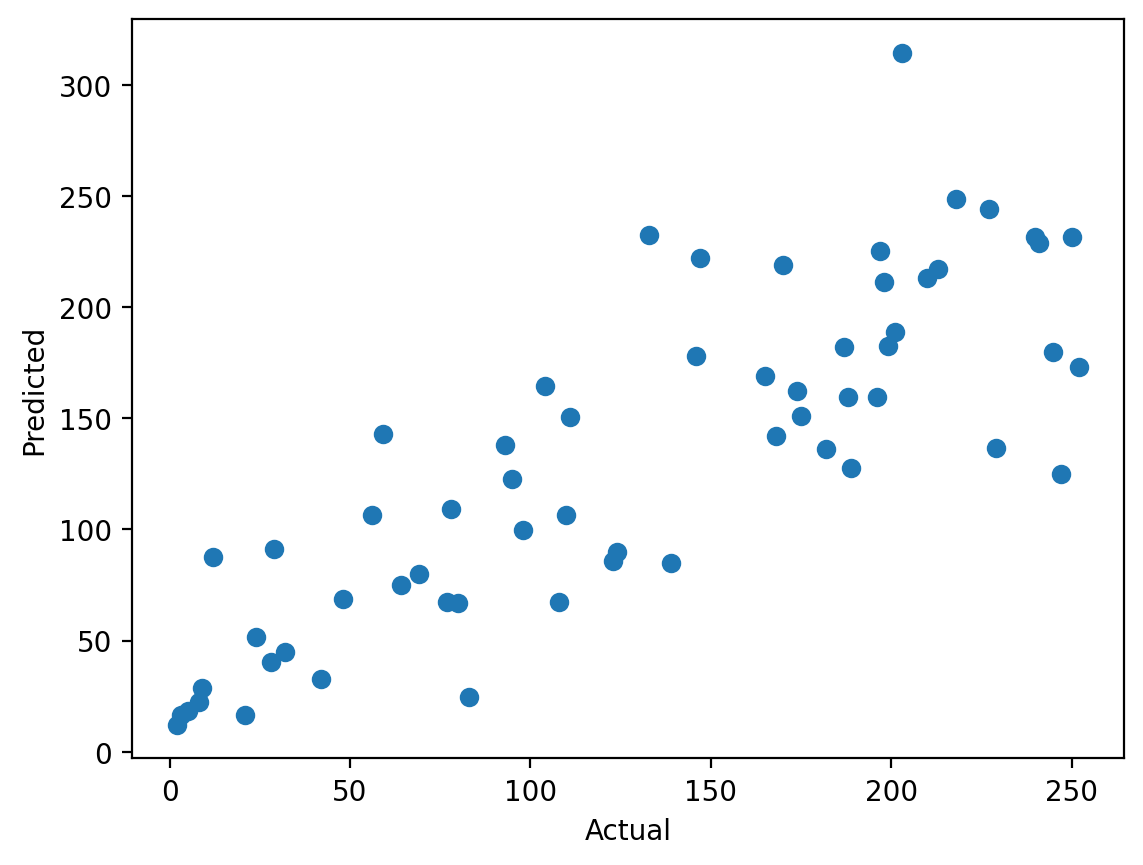

In [70]:
plt.scatter(y2_test, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [73]:
# MSE for ANN
metrics.mean_squared_error(y2_test, predictions)

1997.8379288379356

In [75]:
# MSE for Histogram Gradient Boosting Regressor Model
# This is a much better model
metrics.mean_squared_error(y_test, preds2)

950.25

## Tune ANN Model

Was able to slightly improve the model by adjusting the hiddle layer sizes - however, this model is still significantly worse than the Histogram Gradient Boosting Regressor Model

In [145]:
# Create and fit model
# Changing hidden layer sizes, activation function, and solver
regr2 = MLPRegressor(random_state=1, hidden_layer_sizes=(150,75,50),
                       max_iter = 500, activation = 'relu',
                       solver = 'adam').fit(X2_train, y2_train)

/Users/wesjurden/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [146]:
# Predictions for tuned ANN
predictions2 = regr2.predict(X2_test)

In [147]:
# MSE for ANN2
# Droped MSE by 300 - still could improve
metrics.mean_squared_error(y2_test, predictions2)

1642.2056675072467

Text(0, 0.5, 'Predicted')

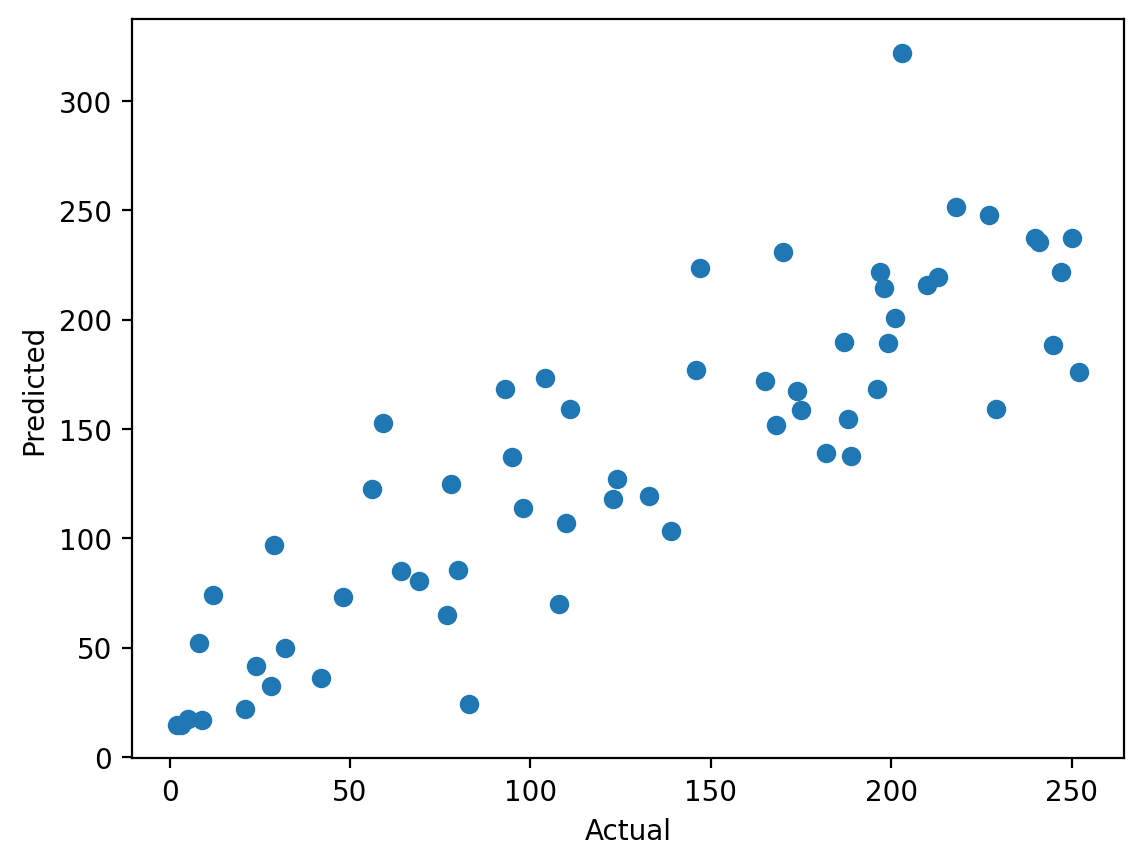

In [132]:
plt.scatter(y2_test, predictions2)
plt.xlabel('Actual')
plt.ylabel('Predicted')